<a href="https://colab.research.google.com/github/utkarsh0702/Projects/blob/master/Google_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [18]:
result = pd.read_excel('StockData.xlsx', parse_dates= True)
result

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000,50.220219
1,2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300,54.209209
2,2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100,54.754753
3,2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300,52.487488
4,2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600,53.053055
...,...,...,...,...,...,...,...
4028,2020-08-19,1568.859985,1540.000000,1552.489990,1544.609985,1523600,1544.609985
4029,2020-08-20,1580.170044,1534.459961,1539.969971,1576.250000,1319100,1576.250000
4030,2020-08-21,1591.880005,1562.310059,1571.800049,1575.569946,1741900,1575.569946
4031,2020-08-24,1608.780029,1575.040039,1592.469971,1585.150024,1281900,1585.150024


**Closing Price Plot**

In [19]:
fig= px.bar(result, x='Date', y='Close', barmode='group', height=400)
fig.update_layout(title_text='Stock Closing Price', plot_bgcolor='rgb(0,0,0)')
fig.show()

In [20]:
df= result.loc[:,['Date','Close']]
df.set_index('Date', inplace=True)
df

,Close
Date,
2004-08-19,50.220219
2004-08-20,54.209209
2004-08-23,54.754753
2004-08-24,52.487488
2004-08-25,53.053055
...,...
2020-08-19,1544.609985
2020-08-20,1576.250000
2020-08-21,1575.569946


In [21]:
#taking mean and standered deviation
df_mean = df.mean()
df_std = df.std()
#normalizing the data
df = (df-df_mean)/df_std
#to numpy array
df= df.to_numpy()

In [22]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [23]:
univariate_past_history = 12
univariate_future_target = 0

x, y = univariate_data(df, 0, None, univariate_past_history, univariate_future_target)

In [24]:
print('X Shape:',x.shape)
print('Y Shape:',y.shape)

X Shape: (4021, 12, 1)
Y Shape: (4021, 1)


**Learning Rate Schedular**

In [63]:
tf.keras.backend.clear_session()

#creating model
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=-1), input_shape=[None]),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(96, activation='relu', dropout=0.25, recurrent_dropout=0.1, return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(48, activation='relu', dropout=0.25, recurrent_dropout=0.1, return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24, activation='relu', dropout=0.25, recurrent_dropout=0.1)),
                                   tf.keras.layers.Dropout(0.15),
                                   tf.keras.layers.Dense(1),
                                   ])
lr_schedular= tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-6*10**(x/20))

adam= tf.keras.optimizers.Adam(lr=1e-6)
model.compile(optimizer= adam, loss= 'mse')
#Smodel.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 192)         75264     
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 96)          92544     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 48)                23232     
_________________________________________________________________
dropout (Dropout)            (None, 48)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 49        
Total params: 191,089
Trainable params: 191,089
Non-trainable params: 0
__________________________________________________

In [64]:
history= model.fit(x, y, epochs= 100, callbacks= [lr_schedular])

Epoch 1/100
126/126 [==============================] - 10s 83ms/step - loss: 1.0259
Epoch 2/100
126/126 [==============================] - 10s 82ms/step - loss: 1.0196
Epoch 3/100
126/126 [==============================] - 10s 82ms/step - loss: 1.0126
Epoch 4/100
126/126 [==============================] - 10s 83ms/step - loss: 1.0055
Epoch 5/100
126/126 [==============================] - 10s 82ms/step - loss: 0.9983
Epoch 6/100
126/126 [==============================] - 10s 82ms/step - loss: 0.9893
Epoch 7/100
126/126 [==============================] - 10s 82ms/step - loss: 0.9802
Epoch 8/100
126/126 [==============================] - 10s 82ms/step - loss: 0.9689
Epoch 9/100
126/126 [==============================] - 10s 83ms/step - loss: 0.9560
Epoch 10/100
126/126 [==============================] - 10s 82ms/step - loss: 0.9411
Epoch 11/100
126/126 [==============================] - 10s 82ms/step - loss: 0.9215
Epoch 12/100
126/126 [==============================] - 10s 82ms/step - lo

In [65]:
loss= min(history.history['loss'])
losses= history.history['loss']
index=losses.index(loss)
lrs= history.history['lr']
count=0
for i in lrs:
  if count==index:
    lr=i
    break
  count+=1
print(lr)
print(loss)

0.0015848932
0.013070321641862392


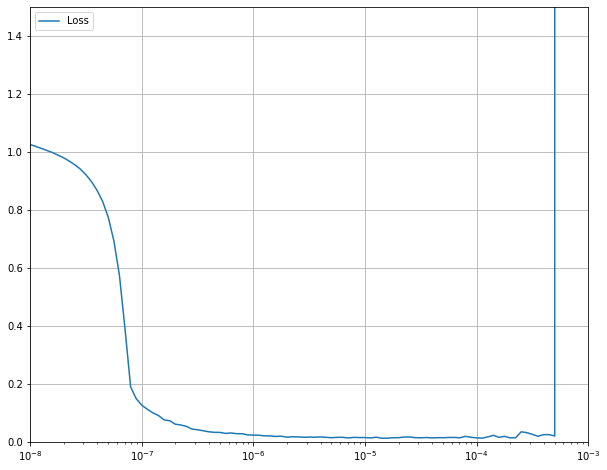

In [66]:
lrs= 1e-8*(10**(np.arange(100)/20))
plt.semilogx(lrs, history.history["loss"], label='Loss')
plt.axis([1e-8, 1e-3, 0, 1.5])
plt.legend(loc='best')  
plt.grid(True)

**Model Building**

In [67]:
tf.keras.backend.clear_session()

#creating model
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=-1), input_shape=[None]),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(96, activation='relu', dropout=0.25, recurrent_dropout=0.1, return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(48, activation='relu', dropout=0.25, recurrent_dropout=0.1, return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24, activation='relu', dropout=0.25, recurrent_dropout=0.1)),
                                   tf.keras.layers.Dropout(0.15),
                                   tf.keras.layers.Dense(1),
                                   ])

adam= tf.keras.optimizers.Adam(lr=lr)
model.compile(optimizer= adam, loss= 'mse')
#Smodel.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 192)         75264     
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 96)          92544     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 48)                23232     
_________________________________________________________________
dropout (Dropout)            (None, 48)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 49        
Total params: 191,089
Trainable params: 191,089
Non-trainable params: 0
__________________________________________________

In [68]:
history= model.fit(x, y, epochs= 100)

Epoch 1/100
126/126 [==============================] - 10s 81ms/step - loss: 0.0948
Epoch 2/100
126/126 [==============================] - 10s 81ms/step - loss: 0.0268
Epoch 3/100
126/126 [==============================] - 10s 81ms/step - loss: 0.0199
Epoch 4/100
126/126 [==============================] - 10s 81ms/step - loss: 0.0182
Epoch 5/100
126/126 [==============================] - 10s 81ms/step - loss: 0.0176
Epoch 6/100
126/126 [==============================] - 10s 82ms/step - loss: 0.0170
Epoch 7/100
126/126 [==============================] - 10s 81ms/step - loss: 0.0164
Epoch 8/100
126/126 [==============================] - 10s 81ms/step - loss: 0.0144
Epoch 9/100
126/126 [==============================] - 10s 81ms/step - loss: 0.0141
Epoch 10/100
126/126 [==============================] - 10s 81ms/step - loss: 0.0133
Epoch 11/100
126/126 [==============================] - 10s 81ms/step - loss: 0.0128
Epoch 12/100
126/126 [==============================] - 10s 82ms/step - lo

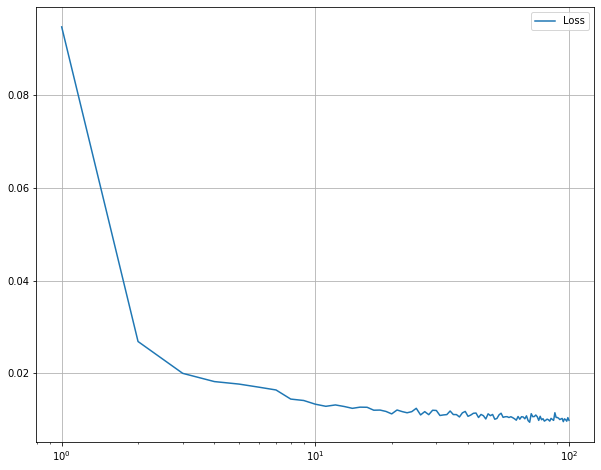

In [69]:
epochs= range(1,101)
plt.semilogx(epochs, history.history["loss"], label='Loss')
plt.legend(loc='best')
plt.grid(True)

**After 200 epochs**

(4021, 12, 1)
(4021, 1)


[]

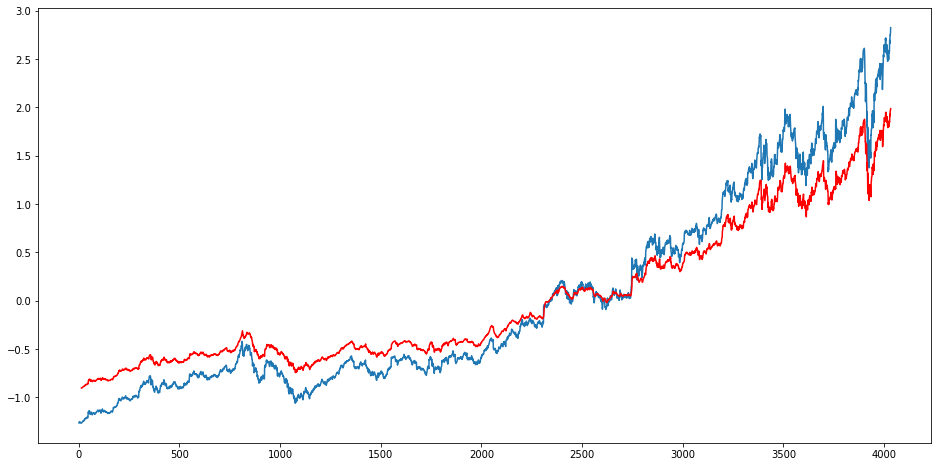

In [70]:
numbers=range(1, 4034)
num= range(13,4034)
plt.figure(figsize=(16,8)) 
print(x.shape)
y_pred= model.predict(x)
print(y_pred.shape)
plt.plot(numbers,df)
plt.plot(num,y_pred,'r')
plt.plot()